          quantity       price      trade_id      order_id
count   216.000000  216.000000  2.160000e+02  2.160000e+02
mean    140.198249  146.326003  8.380566e+07  5.392860e+17
std     208.400226   79.556562  1.010353e+08  7.872185e+17
min       9.000000   17.709898  2.451900e+06  1.100000e+15
25%      34.000000   68.700000  2.830117e+07  1.200000e+15
50%      57.563724  138.900000  4.467069e+07  1.300000e+15
75%     150.000000  208.250000  6.455416e+07  1.683171e+18
max    1010.308782  300.262194  3.023316e+08  1.688450e+18


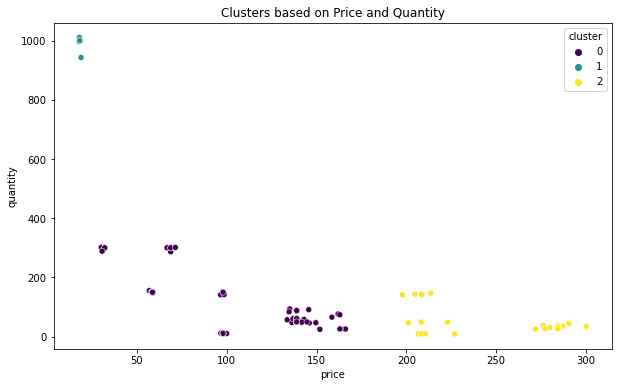

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.arima.model import ARIMA

# Load data
data_path = 'further_expanded_tradebook.csv'  # Update this with the correct path to your file
df = pd.read_csv(data_path)

# Display first few rows of the dataset
df.head()

# Convert 'trade_date' to datetime format and sort by it
df['trade_date'] = pd.to_datetime(df['trade_date'])
df = df.sort_values(by='trade_date')

# Basic Statistics
print(df.describe())

# Risk Analysis via Clustering (Behavioral Segmentation)
# Use price and quantity as features for clustering

features = df[['price', 'quantity']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# KMeans Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(scaled_features)

# Visualize Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='price', y='quantity', hue='cluster', palette='viridis')
plt.title("Clusters based on Price and Quantity")
plt.show()

# Time-Series Analysis with ARIMA on a particular stock (e.g., 'SCHAND')
stock_data = df[df['symbol'] == 'GREAVESCOT'].sort_values(by='trade_date')
stock_data.set_index('trade_date', inplace=True)



C:\Users\Aniket\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Aniket\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Aniket\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Aniket\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


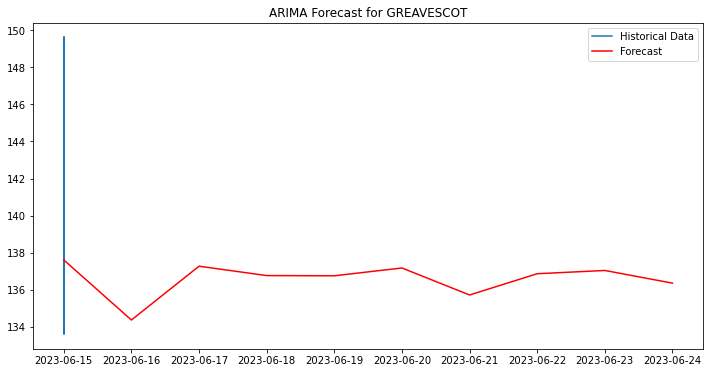

In [29]:
# Time-Series Analysis with ARIMA on a particular stock (e.g., 'SCHAND')
stock_data = df[df['symbol'] == 'GREAVESCOT'].sort_values(by='trade_date')
stock_data.set_index('trade_date', inplace=True)
# Fit ARIMA model
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(stock_data['price'], order=(5,1,0))
model_fit = model.fit()
forecast = model_fit.forecast(steps=10)  # forecasting next 10 time points

# Create a new index for the forecast array
forecast_index = pd.date_range(start=stock_data.index[-1], periods=10, freq=stock_data.index.freq)

# Visualize Forecast
plt.figure(figsize=(12, 6))
plt.plot(stock_data.index, stock_data['price'], label='Historical Data')
plt.plot(forecast_index, forecast, color='red', label='Forecast')  # Use the new forecast_index here
plt.title('ARIMA Forecast for GREAVESCOT')
plt.legend()
plt.show()
